In [5]:
%matplotlib inline
from sklearn import linear_model
import scipy.stats
import os
import shutil
import re
import numpy as np
import pandas as pd
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
from Bio import SeqIO
from src import contig_stats
sns.set_style("whitegrid")

In [47]:
path = "/media/NGS/Sequences/E.coli_complex/NCBI/"

In [48]:
def run(args):
    fasta, file = args
    id = re.sub(r".fna$", "", file)
    n25, n50, n75, m, c = contig_stats.stats(list(SeqIO.parse(fasta, "fasta")))
    return id, n25, n50, n75, m, c

In [49]:
args = ((os.path.join(path, file), file) for file in os.listdir(path))
data = list(ProcessPoolExecutor(25).map(run, args))

In [50]:
table = pd.DataFrame(data, columns=["id", "N25", "N50", "N75", "total_length", "counts"])
table

,id,N25,N50,N75,total_length,counts
0,GCA_003095635.1,4971313,4971313,4971313,4971313,1
1,GCA_001886895.1,5189944,5189944,5189944,5267283,2
2,GCA_001999185.1,4643284,4643284,4643284,4643284,1
3,GCA_003018475.1,4836918,4836918,4836918,4999728,2
4,GCA_003017975.1,5317846,5317846,5317846,5388459,2
5,GCA_002949755.1,4382687,4382687,4382687,4452486,2
6,GCA_001901465.1,4886210,4886210,4886210,4886210,1
7,GCA_000025165.1,5386352,5386352,5386352,5452353,2
8,GCA_002953775.1,4651842,4651842,4651842,4651842,1
9,GCA_002310675.1,4697886,4697886,4697886,5091284,6


# N25, N50, N75

Text(0.5,1,'cumulative Shigella sonnei contigs N25, N50, N75')

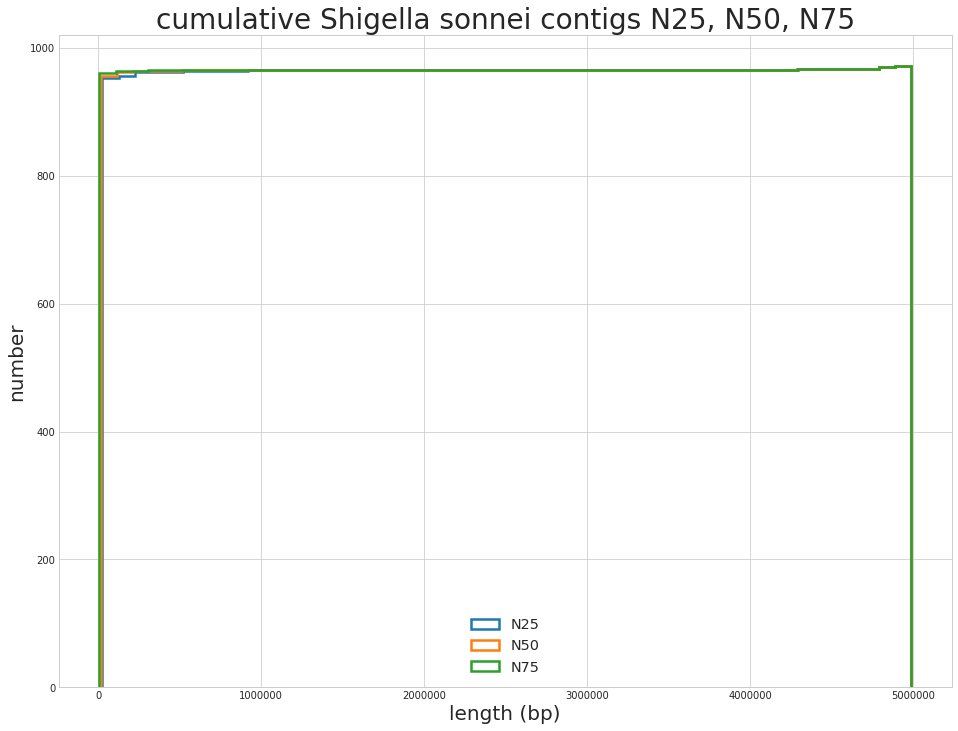

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["N25"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(table["N50"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(table["N75"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xlabel("length (bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("cumulative Shigella sonnei contigs N25, N50, N75", fontsize=28)
# plt.savefig("pics/cumulative Vibrio cholerae contigs quality.png")

Text(0.5,1,'cumulative Shigella sonnei contigs N25, N50, N75')

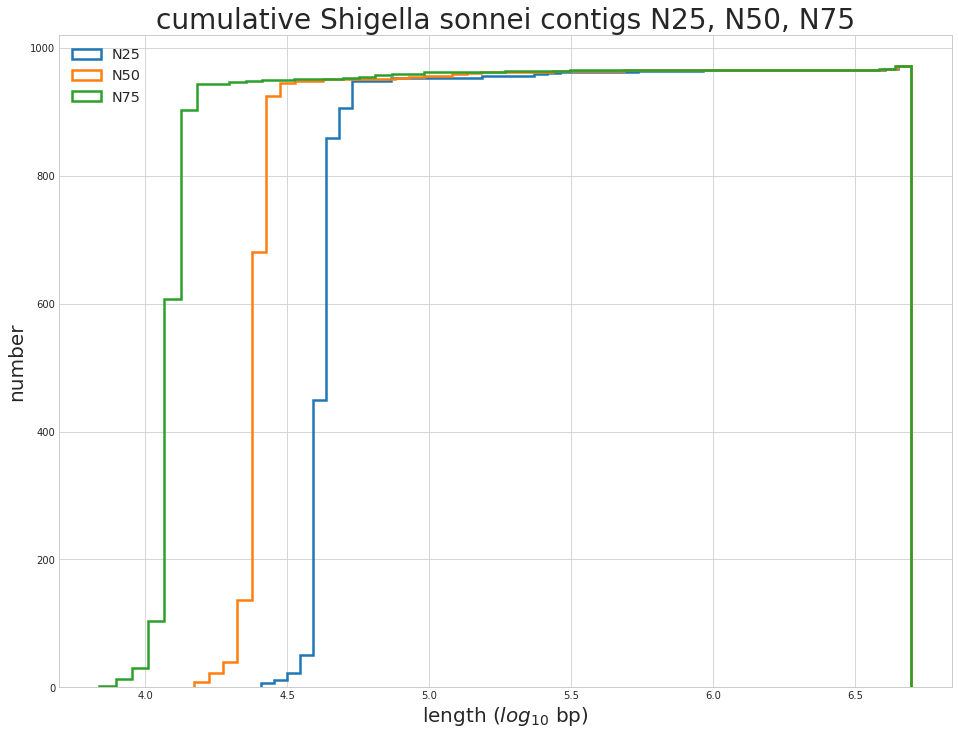

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(np.log10(table["N25"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(np.log10(table["N50"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(np.log10(table["N75"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel("length ($log_{10}$ bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("cumulative Shigella sonnei contigs N25, N50, N75", fontsize=28)
# plt.savefig("pics/cumulative Vibrio cholerae contigs quality log-scale.png")

# Counts

Text(0.5,1,'Genome contig number distribution')

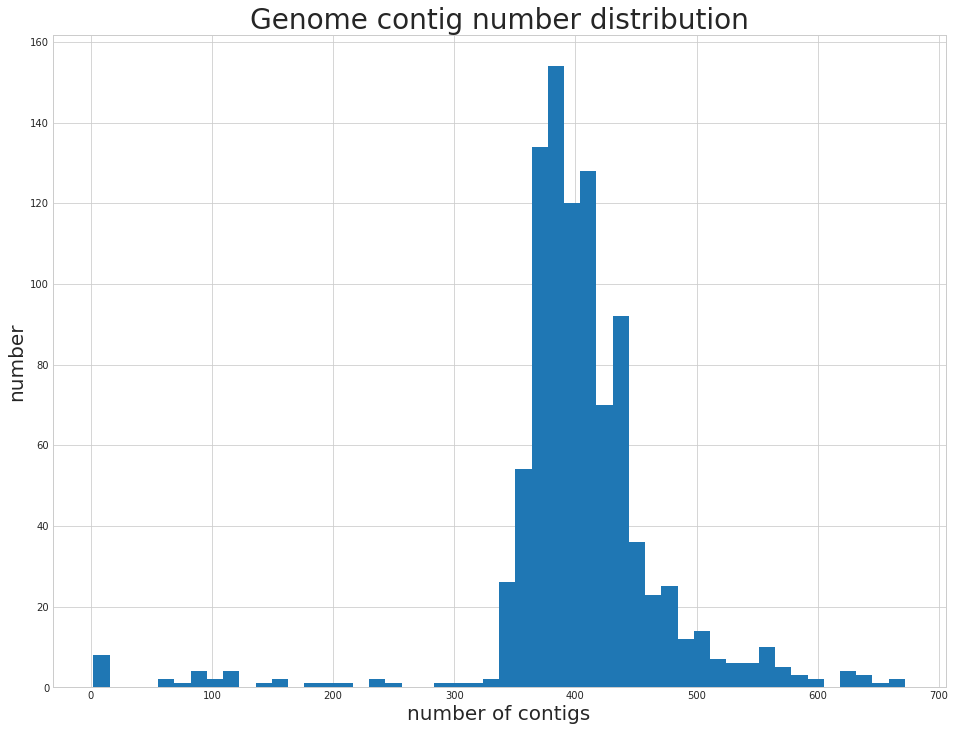

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution", fontsize=28)
# plt.savefig("pics/Vibrio cholerae genome contig number distribution.png")

Text(0.5,1,'Genome contig number distribution (> 600)')

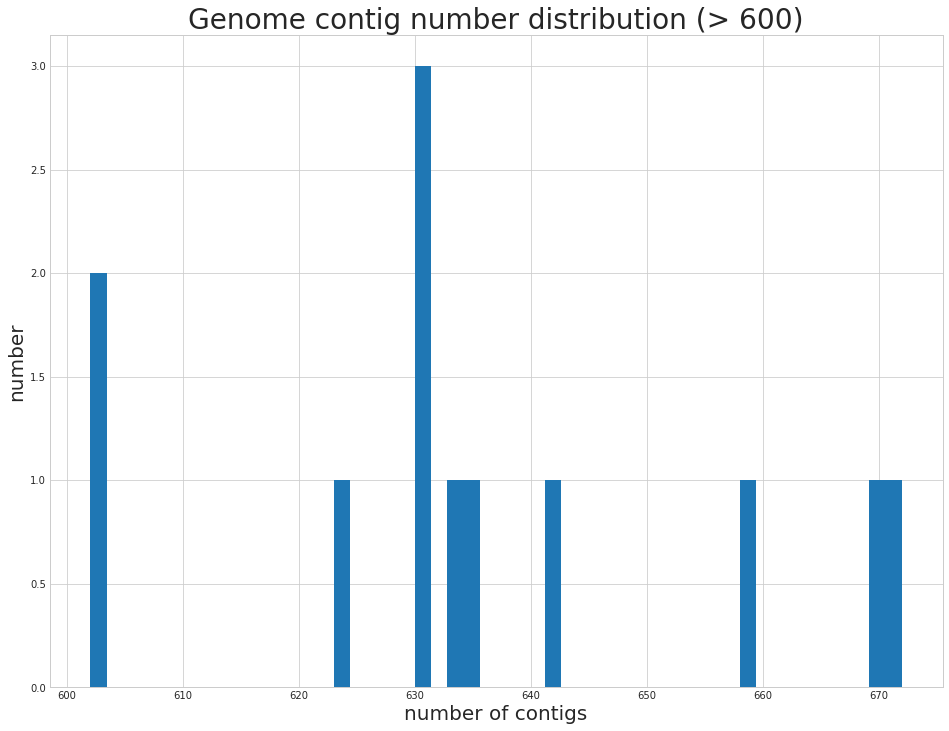

In [13]:
plt.figure(figsize=(16, 12))
plt.hist(table[table["counts"] > 600]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (> 600)", fontsize=28)
# plt.savefig("pics/Vibrio cholerae genome contig number distribution larger 200.png")

Text(0.5,1,'Genome contig number distribution (<= 600)')

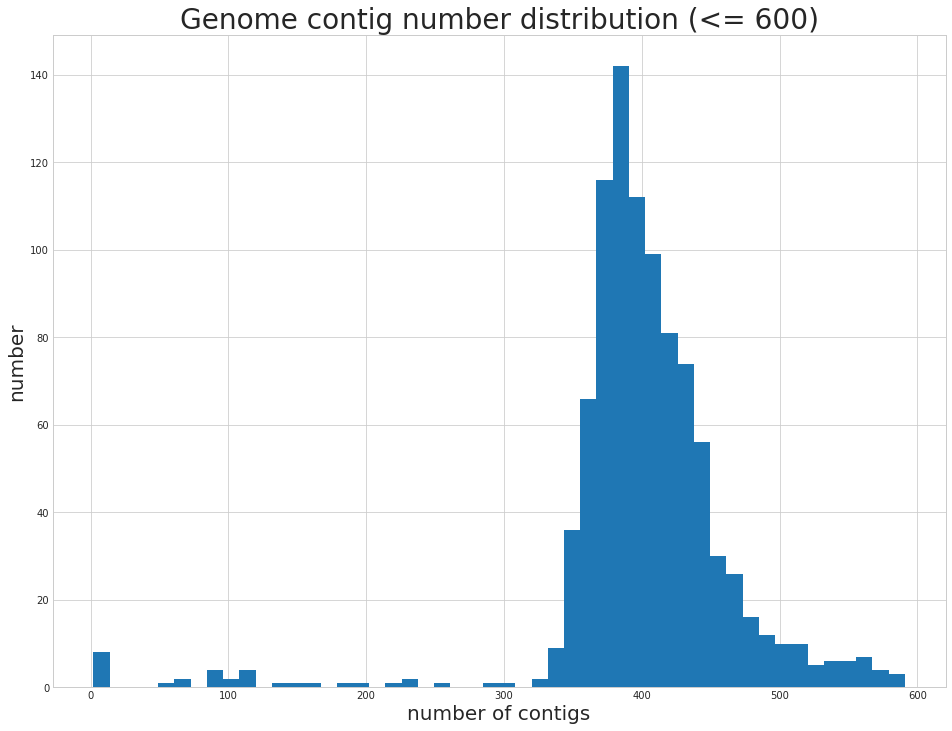

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table[table["counts"] <= 600]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (<= 600)", fontsize=28)
# plt.savefig("pics/Vibrio cholerae genome contig number distribution lower 200.png")

# comparison with serotypes

In [28]:
curated = table[(table["counts"] <= 600) & (table["N50"] >= 10 ** 4.4)]

In [29]:
curated.shape

(751, 6)

# rule out plasmid only and contaminated

In [17]:
curated.index = [x[0:15] for x in curated["id"]]

# Combine metadata selection

In [19]:
metafile = "/media/NGS/Sequences/Shigella_sonnei/METADATA.csv"
meta = pd.read_csv(metafile)
meta["Assembly"] = [x.strip() for x in meta["Assembly"]]
# meta = meta[meta["GC%"] != "-"]
meta["GC%"] = list(map(lambda x: float(x), meta["GC%"]))

In [30]:
curated = pd.merge(curated, meta, left_index=True, left_on='id', right_on="Assembly")

In [31]:
curated

,id,N25,N50,N75,total_length,counts,#Organism/Name,Strain,CladeID,BioSample,...,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Level,RefSeq FTP,GenBank FTP
143,GCA_900162775.1,41206,25964,13175,4480914,359,Shigella sonnei,sh1413,19668,SAMEA1569749,...,-,FUGA01,359,4914,4260,2017/02/07,2017/02/26,Contig,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900...
536,GCA_001258635.1,44502,27318,13869,4825174,407,Shigella sonnei,201405357_1,19668,SAMEA3345104,...,-,CWWM01,407,5410,4634,2015/07/16,2017/02/24,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
538,GCA_001258675.1,44019,25439,12101,4742134,456,Shigella sonnei,KY 1243,19668,SAMEA2434370,...,-,CWXS01,456,5509,4472,2015/07/16,2017/02/24,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
534,GCA_001258595.1,43994,25964,12004,4708780,452,Shigella sonnei,143560,19668,SAMEA2057989,...,-,CXMS01,452,5356,4520,2015/07/16,2017/02/24,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
168,GCA_001248085.1,46202,25898,12139,4739295,450,Shigella sonnei,KY 1633,19668,SAMEA2434372,...,-,CWXU01,450,5530,4475,2015/07/16,2017/02/24,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
226,GCA_001249655.1,43427,25303,12265,4728615,413,Shigella sonnei,82721,19668,SAMEA2003379,...,-,CXIB01,413,5356,4567,2015/07/16,2017/02/24,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
641,GCA_001261635.1,44019,25431,11874,4982560,474,Shigella sonnei,20177848,19668,SAMEA2434376,...,-,CWYA01,474,5803,4792,2015/07/16,2017/02/24,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
689,GCA_001688875.1,41051,25469,12269,4462098,432,Shigella sonnei,CDPH_C21,19668,SAMN04440945,...,-,LXVP01,432,4782,4279,2016/07/20,2017/02/25,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
169,GCA_001248155.1,43894,25729,13431,4761701,396,Shigella sonnei,H141000108,19668,SAMEA2445767,...,-,CXAF01,396,5392,4594,2015/07/16,2017/02/24,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
564,GCA_001259395.1,41346,25964,12433,4861039,431,Shigella sonnei,36860548,19668,SAMEA2004001,...,-,CXLM01,431,5535,4686,2015/07/16,2017/02/24,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...


/home/chen1i6c04/.local/share/virtualenvs/notebook-au3UQeJO/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


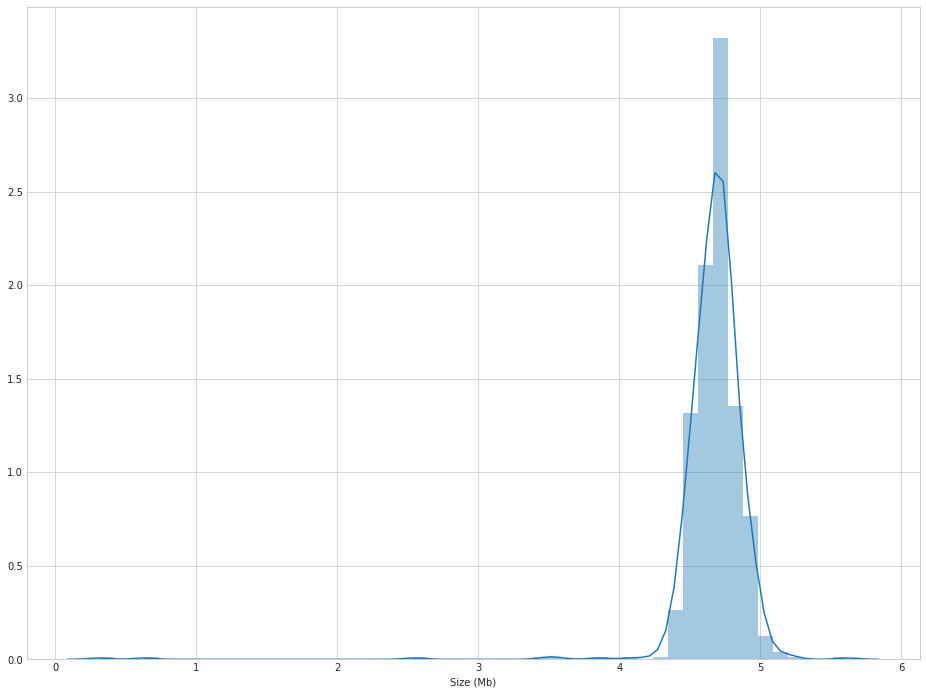

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.distplot(curated["Size (Mb)"], ax=ax)
# fig.savefig("pics/Vibrio cholerae genome size distribution.png")

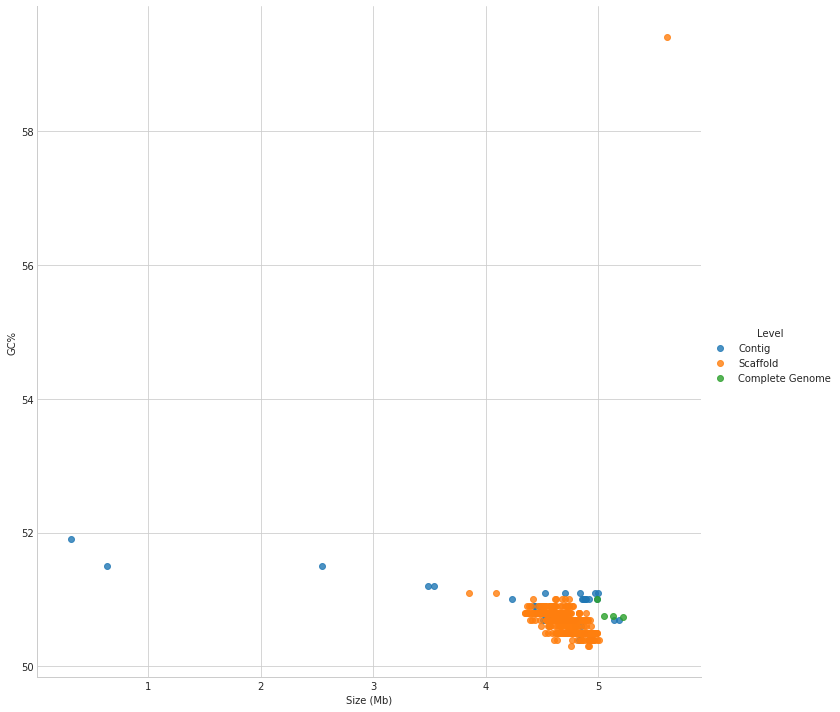

In [33]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", hue="Level", fit_reg=False, size=10)
# plt.savefig("pics/Vibrio cholerae genome size-GC content plot.png")

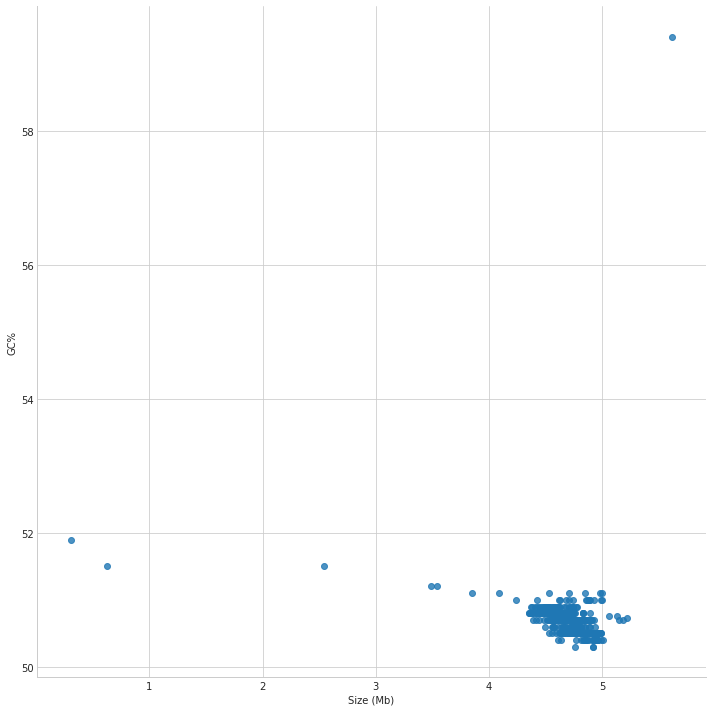

In [34]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", fit_reg=False, size=10)
# plt.savefig("pics/Vibrio cholerae genome size-GC content plot.png")

In [43]:
model = linear_model.HuberRegressor(epsilon=2.5)
model.fit(curated[["Size (Mb)"]].as_matrix(), list(curated["GC%"]))

HuberRegressor(alpha=0.0001, epsilon=2.5, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [44]:
curated["y_mean"] = model.predict(curated[["Size (Mb)"]])
curated["corrected_y"] = curated["GC%"] - curated["y_mean"]
curated["outliers"] = model.outliers_

/home/chen1i6c04/.local/share/virtualenvs/notebook-au3UQeJO/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


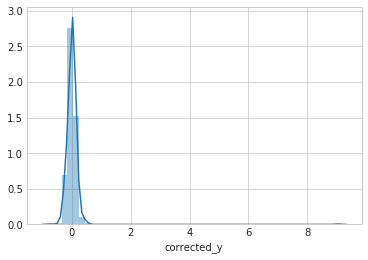

In [45]:
sns.distplot(curated["corrected_y"])

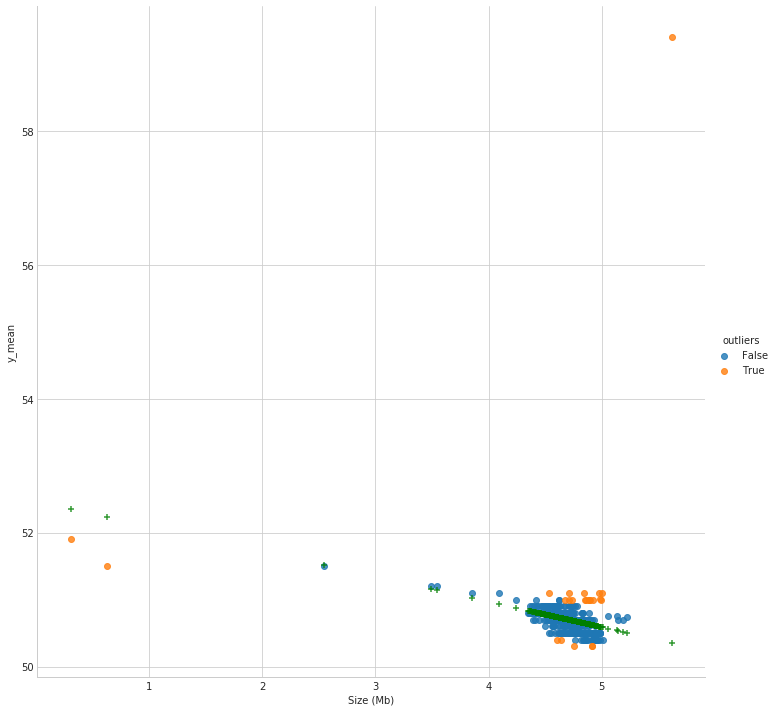

In [46]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", hue="outliers", fit_reg=False, size=10)
sns.regplot(x="Size (Mb)", y="y_mean", data=curated, color="g", marker="+", fit_reg=False)
# plt.savefig("pics/Vibrio cholerae genome size-GC content plot outliers.png")

In [29]:
curated = curated[~curated['outliers']]

In [30]:
curated.to_csv("results/Vibrio_cholerae_data_clean.tsv", sep="\t", index=False)

# selection of clean dataset

In [31]:
dst = "/media/NGS/Sequences/Vibrio_cholerae/NCBI_clean"
for file in curated["id"]:
    shutil.copyfile(os.path.join(path, file), os.path.join(dst, file))